In [44]:
import numpy as np 
import pandas as pd 

In [45]:
d = pd.read_csv('data_cleaned.csv', sep =',')
d

,review_rate,review_text,object_address,overall_rating,review_num,object_url,date_complete,postal_code,year,latitude_longitude,latitude,longitude
0,1,"Agents d'accueil à l'entrée très bien, mais la...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,janvier 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856
1,5,Aujourd'hui vendredi 4/02/2022 sur les coups d...,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856
2,1,Déjà pour les horaires\nBornes en panne,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856
3,1,"Agents sans professionnalisme, interrompant la...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,mars 2021,75012,2021.0,"(48.8381167, 2.3938557)",48.838117,2.393856
4,5,Merci aux personnel un accueil chaleureux,"5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,décembre 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856
...,...,...,...,...,...,...,...,...,...,...,...,...
711,4,Excellent,"37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,décembre 2022,75018,2022.0,"(48.8977862, 2.3475122)",48.897786,2.347512
712,1,Les pires employés et les récalcitrants,"37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,septembre 2022,75018,2022.0,"(48.8977862, 2.3475122)",48.897786,2.347512
713,4,Non,"37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,décembre 2022,75018,2022.0,"(48.8977862, 2.3475122)",48.897786,2.347512
714,1,Une attention terrible !,"37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,NaN,75018,NaN,"(48.8977862, 2.3475122)",48.897786,2.347512


In [46]:
#suppression des ponctuations et caracteres speciaux : 
import re

def clean_text(text):
    # Supprimer les caractères spéciaux et la ponctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convertir en minuscules
    text = text.lower()

    return text

# Appliquer la fonction de nettoyage aux avis
d['review_text'] = d['review_text'].apply(clean_text)


In [47]:
import re

def remove_digits(text):
    # Modèle de regex pour les chiffres
    digit_pattern = re.compile(r'\d+')
    # Supprimer les chiffres
    text = re.sub(digit_pattern, '', text)
    return text
d['review_text'] = d['review_text'].apply(remove_digits)

In [50]:
import re

def remove_emojis(text):
    # Modèle de regex pour les emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # émoticônes émotions
                               u"\U0001F300-\U0001F5FF"  # symboles & pictogrammes
                               u"\U0001F680-\U0001F6FF"  # transports & symboles de voyage
                               u"\U0001F1E0-\U0001F1FF"  # drapeaux (indicateurs de pays)
                               u"\U00002500-\U00002BEF"  # caractères supplémentaires courants
                               u"\U00002702-\U000027B0"  # symboles divers
                               u"\U00002702-\U000027B0"  # flèches
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    # Supprimer les emojis
    text = emoji_pattern.sub(r'', text)
    return text
d['review_text'] = d['review_text'].apply(remove_emojis)

In [51]:
#Tokenization: 
from nltk.tokenize import word_tokenize

# Appliquer la tokenisation aux avis
d['review_text'] = d['review_text'].apply(word_tokenize)


In [52]:
#suppression des stopwords français: 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
#juste pour afficher les stopwords fr 
from nltk.corpus import stopwords

stop_words = stopwords.words('french')
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [54]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('french'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Supprimer les mots vides des avis
d['review_text'] = d['review_text'].apply(remove_stopwords)

In [55]:
d['review_text']

0      [agents, daccueil, lentre, trs, bien, personne...
1      [aujourdhui, vendredi, coups, h, venu, cpam, d...
2                          [dj, horaires, bornes, panne]
3      [agents, sans, professionnalisme, interrompant...
4                [merci, personnel, accueil, chaleureux]
                             ...                        
711                                          [excellent]
712                       [pires, employs, rcalcitrants]
713                                                [non]
714                                [attention, terrible]
715                                                 [ah]
Name: review_text, Length: 716, dtype: object

In [56]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer


# Initialiser le stemmer et le lemmatiseur
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Exemple de fonction pour appliquer le stemming sur une liste de tokens
def apply_stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Exemple de fonction pour appliquer la lemmatisation sur une liste de tokens
def apply_lemmatization(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [57]:
#les appliquer sur mon dataset : 
d['review_text'] = d['review_text'].apply(apply_stemming)

In [58]:
#d['review_text'] = d['review_text'].apply(apply_lemmatization)

In [59]:
d['review_text']

0      [agent, daccueil, lentr, tr, bien, personn, de...
1      [aujourdhui, vendredi, coup, h, venu, cpam, da...
2                               [dj, horair, born, pann]
3      [agent, san, professionnalism, interromp, paro...
4                [merci, personnel, accueil, chaleureux]
                             ...                        
711                                              [excel]
712                             [pire, employ, rcalcitr]
713                                                [non]
714                                    [attent, terribl]
715                                                 [ah]
Name: review_text, Length: 716, dtype: object

In [60]:
# Télécharger les ressources nécessaires pour l'étiquetage grammatical
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [61]:
#supprimer les noms propres: 

# Exemple de fonction pour supprimer les noms propres d'une liste de tokens
def remove_proper_nouns(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    filtered_tokens = [token for token, tag in tagged_tokens if tag != 'NNP']
    return filtered_tokens
d['review_text'] = d['review_text'].apply(remove_proper_nouns)

In [62]:
d['review_text']

0      [agent, daccueil, lentr, tr, bien, personn, de...
1      [aujourdhui, vendredi, coup, h, venu, cpam, da...
2                               [dj, horair, born, pann]
3      [agent, san, professionnalism, interromp, paro...
4                [merci, personnel, accueil, chaleureux]
                             ...                        
711                                              [excel]
712                             [pire, employ, rcalcitr]
713                                                [non]
714                                    [attent, terribl]
715                                                 [ah]
Name: review_text, Length: 716, dtype: object

# sentiment analysis 

In [63]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [64]:
# Charger le lexique pour l'analyse de sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
# Initialiser le SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [68]:
# Fonction pour effectuer l'analyse de sentiment sur un texte
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    # La valeur "compound" représente le score global de sentiment
    sentiment_score = sentiment_scores['compound']
    # Évaluer le sentiment en fonction du score
    if sentiment_score > 0:
        sentiment = 'Positive'
    elif sentiment_score <= 0:
        sentiment = 'Negative'
        
    return sentiment


In [71]:
# Boucle sur votre ensemble de données
for index, row in d.iterrows():
    review_text = ' '.join(row['review_text'])  # Recaster la liste en texte
    sentiment = analyze_sentiment(review_text)
    print(f"Review {index+1}: {sentiment}")

Review 1: Negative
Review 2: Negative
Review 3: Negative
Review 4: Negative
Review 5: Negative
Review 6: Negative
Review 7: Negative
Review 8: Positive
Review 9: Negative
Review 10: Negative
Review 11: Negative
Review 12: Negative
Review 13: Negative
Review 14: Negative
Review 15: Negative
Review 16: Negative
Review 17: Negative
Review 18: Negative
Review 19: Negative
Review 20: Negative
Review 21: Negative
Review 22: Negative
Review 23: Positive
Review 24: Positive
Review 25: Negative
Review 26: Negative
Review 27: Negative
Review 28: Negative
Review 29: Positive
Review 30: Negative
Review 31: Negative
Review 32: Positive
Review 33: Negative
Review 34: Negative
Review 35: Positive
Review 36: Negative
Review 37: Positive
Review 38: Positive
Review 39: Negative
Review 40: Positive
Review 41: Positive
Review 42: Positive
Review 43: Positive
Review 44: Positive
Review 45: Negative
Review 46: Negative
Review 47: Negative
Review 48: Positive
Review 49: Negative
Review 50: Positive
Review 51

Review 576: Negative
Review 577: Negative
Review 578: Negative
Review 579: Negative
Review 580: Negative
Review 581: Positive
Review 582: Negative
Review 583: Negative
Review 584: Negative
Review 585: Negative
Review 586: Negative
Review 587: Negative
Review 588: Positive
Review 589: Negative
Review 590: Positive
Review 591: Negative
Review 592: Negative
Review 593: Positive
Review 594: Negative
Review 595: Negative
Review 596: Positive
Review 597: Negative
Review 598: Positive
Review 599: Positive
Review 600: Positive
Review 601: Positive
Review 602: Negative
Review 603: Positive
Review 604: Positive
Review 605: Positive
Review 606: Positive
Review 607: Negative
Review 608: Negative
Review 609: Negative
Review 610: Negative
Review 611: Negative
Review 612: Positive
Review 613: Positive
Review 614: Negative
Review 615: Negative
Review 616: Negative
Review 617: Negative
Review 618: Negative
Review 619: Positive
Review 620: Positive
Review 621: Negative
Review 622: Negative
Review 623: N

In [72]:
d['sentiment'] = d['review_text'].apply(lambda x: analyze_sentiment(' '.join(x)))

In [73]:
d

,review_rate,review_text,object_address,overall_rating,review_num,object_url,date_complete,postal_code,year,latitude_longitude,latitude,longitude,sentiment
0,1,"[agent, daccueil, lentr, tr, bien, personn, de...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,janvier 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
1,5,"[aujourdhui, vendredi, coup, h, venu, cpam, da...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
2,1,"[dj, horair, born, pann]","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
3,1,"[agent, san, professionnalism, interromp, paro...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,mars 2021,75012,2021.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
4,5,"[merci, personnel, accueil, chaleureux]","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,décembre 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,4,[excel],"37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,décembre 2022,75018,2022.0,"(48.8977862, 2.3475122)",48.897786,2.347512,Positive
712,1,"[pire, employ, rcalcitr]","37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,septembre 2022,75018,2022.0,"(48.8977862, 2.3475122)",48.897786,2.347512,Negative
713,4,[non],"37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,décembre 2022,75018,2022.0,"(48.8977862, 2.3475122)",48.897786,2.347512,Negative
714,1,"[attent, terribl]","37 Rue Belliard, 75018 Paris, France",2.2,81,https://www.google.fr/maps/place/CPAM+de+Paris...,NaN,75018,NaN,"(48.8977862, 2.3475122)",48.897786,2.347512,Negative


In [74]:
d['review_text']

0      [agent, daccueil, lentr, tr, bien, personn, de...
1      [aujourdhui, vendredi, coup, h, venu, cpam, da...
2                               [dj, horair, born, pann]
3      [agent, san, professionnalism, interromp, paro...
4                [merci, personnel, accueil, chaleureux]
                             ...                        
711                                              [excel]
712                             [pire, employ, rcalcitr]
713                                                [non]
714                                    [attent, terribl]
715                                                 [ah]
Name: review_text, Length: 716, dtype: object

In [75]:
import plotly.graph_objects as go

# Compter le nombre d'occurrences pour chaque catégorie
category_counts = d['sentiment'].value_counts()

# Définir les couleurs personnalisées pour chaque catégorie
colors = ['red', 'green']

# Créer un diagramme circulaire avec les couleurs personnalisées
fig = go.Figure(data=go.Pie(labels=category_counts.index, values=category_counts, 
                           textinfo='label+percent', marker=dict(colors=colors)))

# Ajouter un titre
fig.update_layout(title='Répartition des catégories')

# Afficher le diagramme
fig.show()


In [76]:
category_counts

Negative    564
Positive    152
Name: sentiment, dtype: int64

# Modele de prediction :  

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [78]:
# Préparation des données
X = d['review_text']
y = d['sentiment']

In [79]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Convertir X_train en liste de chaînes de caractères
X_train = X_train.tolist()
X_train = [str(texte) for texte in X_train]

# Convertir X_test en liste de chaînes de caractères
X_test = X_test.tolist()
X_test = [str(texte) for texte in X_test]


In [81]:
# Création d'un vecteur TF-IDF pour représenter les caractéristiques
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [82]:
# Entraînement du modèle SVM
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [83]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)
y_pred

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negati

In [84]:
# Évaluation de la performance
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Précision du modèle : 85.42%


#  viz 

In [184]:
d.to_csv('final_data.csv', index=False)

In [85]:
d['review_text2'] = [' '.join(element) for element in d['review_text']]

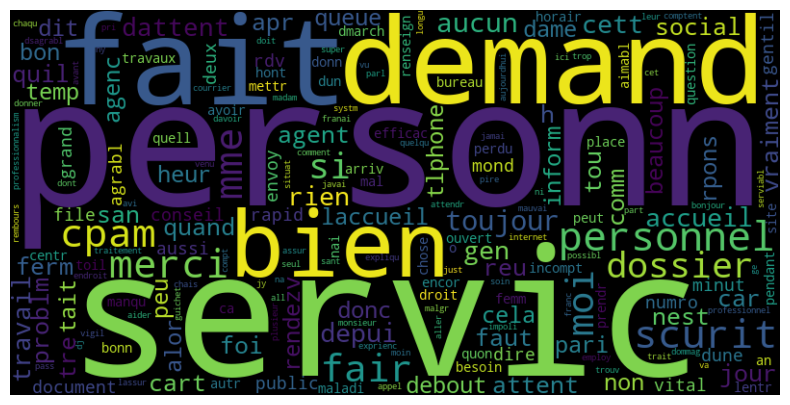

In [90]:
# Concaténer tous les éléments de la colonne en une seule chaîne de texte
texte = ' '.join(d['review_text2'])

# Mots à exclure du nuage de mots
mots_exclus = ['tr', 'plu', 'cest', 'jai', 'tout', 'a']

# Supprimer les mots exclus de la liste des mots
mots = [mot for mot in texte.split() if mot not in mots_exclus]

# Compter la fréquence des mots
freq_mots = Counter(mots)

# Créer un objet WordCloud avec la taille des mots basée sur leur fréquence
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_mots)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()